In [9]:
import numpy as np
import pandas as pd
import os

In [10]:
# Dictionary to store image paths
image_paths = {
    "train_cataract": [],
    "train_normal": [],
    "test_cataract": [],
    "test_normal": []
}

# Walk through the directory
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train\\cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train\\normal" in path:
            image_paths["train_normal"].append(path)
        elif "test\\cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test\\normal" in path:
            image_paths["test_normal"].append(path)

In [11]:
len(image_paths["train_normal"])

250

In [12]:
from PIL import Image
from matplotlib import pyplot as plt

size of image : (512, 512, 3)


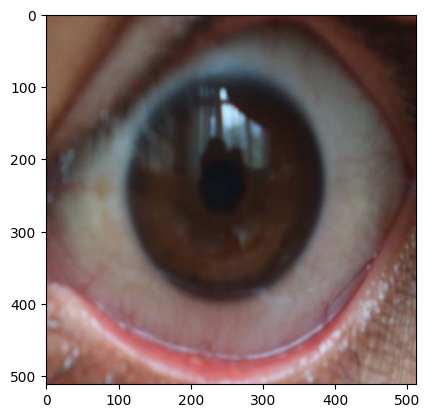

In [13]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

size of image : (800, 1200, 3)


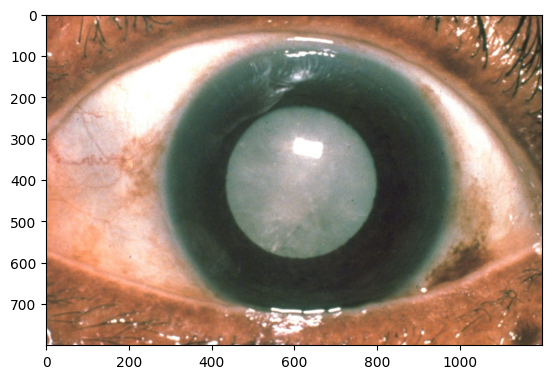

In [14]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [15]:
training_dir = "data\\train\\"
image_size = (55, 94, 3)
target_size = (55, 94)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 689 images belonging to 2 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop

In [19]:
model = Sequential([
    # Convolutional Neural Network (CNN) for feature extraction
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense Neural Network (DNN) for classification
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 92, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 46, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 44, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 10, 128)       0

In [21]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_generator,
    epochs=15
)

Epoch 1/15
22/22 [==============================] - 48s 2s/step - loss: 0.8579 - accuracy: 0.6633
Epoch 2/15
22/22 [==============================] - 35s 2s/step - loss: 0.4785 - accuracy: 0.8142
Epoch 3/15
22/22 [==============================] - 37s 2s/step - loss: 0.3731 - accuracy: 0.8476
Epoch 4/15
22/22 [==============================] - 41s 2s/step - loss: 0.2731 - accuracy: 0.8984
Epoch 5/15
22/22 [==============================] - 39s 2s/step - loss: 0.2411 - accuracy: 0.9144
Epoch 6/15
22/22 [==============================] - 36s 2s/step - loss: 0.2088 - accuracy: 0.9274
Epoch 7/15
22/22 [==============================] - 35s 2s/step - loss: 0.1847 - accuracy: 0.9361
Epoch 8/15
22/22 [==============================] - 35s 2s/step - loss: 0.1396 - accuracy: 0.9507
Epoch 9/15
22/22 [==============================] - 35s 2s/step - loss: 0.1325 - accuracy: 0.9536
Epoch 10/15
22/22 [==============================] - 35s 2s/step - loss: 0.0800 - accuracy: 0.9739
Epoch 11/15
22/22 [

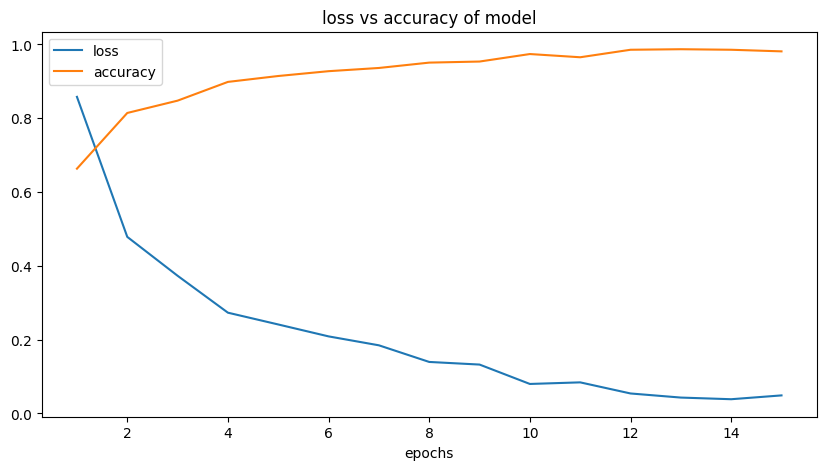

In [23]:
epochs = range(1, 16)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [25]:
# Load test data
test_dir = "data\\test\\"  # adjust with your test data directory
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='binary'
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Found 40 images belonging to 2 classes.
2/2 [==============================] - 2s 106ms/step - loss: 0.4755 - accuracy: 0.9250
Test Loss: 0.47549885511398315
Test Accuracy: 0.925000011920929
